# Analyze the data structure. (Compare the original data and synthetic data)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
plot_path = '../evaluation/structure'

## Prepare the datasets

### Synthetic data

In [7]:
# import synhtetic data
synthetic_data = pd.read_csv('../data_for_markov_model/synthetic_data_mm_SmartTag_(nearby).csv', index_col=0)
synthetic_data

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599996,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599997,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599998,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


### Original data

In [8]:
# import original data
original_data = pd.read_csv('../data_for_markov_model/processed_SmartTag_(nearby).csv', index_col=0)
original_data

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24034,63,37,0,160,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24035,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24036,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


## Compare the data structure

### Channel

In [42]:
# Calculate the percentage of each CH in original_data
original_ch_counts = original_data[['CH 37', 'CH 38', 'CH 39']].sum()
original_ch_percentage = original_ch_counts / original_ch_counts.sum() * 100

# Calculate the percentage of each CH in synthetic_data
synthetic_ch_counts = synthetic_data[['CH 37', 'CH 38', 'CH 39']].sum()
synthetic_ch_percentage = synthetic_ch_counts / synthetic_ch_counts.sum() * 100

# Create a DataFrame for plotting
ch_percentage_df = pd.DataFrame({
    'Original Data': original_ch_percentage,
    'Synthetic Data': synthetic_ch_percentage
})

# Transpose the DataFrame for plotting
ch_percentage_df = ch_percentage_df.T

ch_percentage_df

,CH 37,CH 38,CH 39
Original Data,60.316998,29.765371,9.917630
Synthetic Data,60.232000,29.796333,9.971667


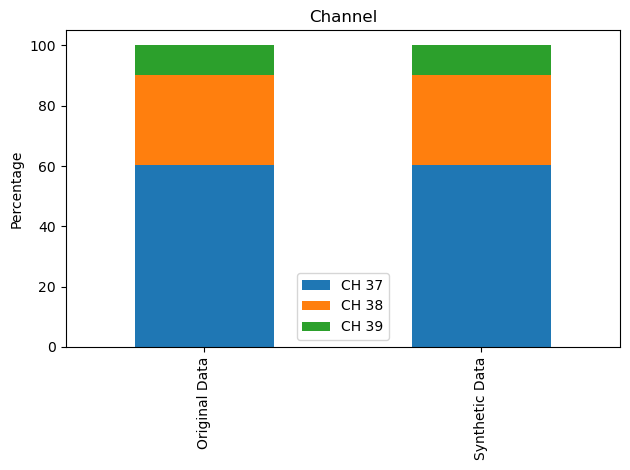

In [43]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
ch_percentage_df_normalized = ch_percentage_df.div(ch_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
ch_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('Channel')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig(f"{plot_path}/channel.png")
plt.show()

### PDU

,Original Data,Synthetic Data
CH 37,60.316998,60.232000
CH 38,29.765371,29.796333
CH 39,9.917630,9.971667


,Original Data,Synthetic Data
CH 37,60.316998,60.232000
CH 38,29.765371,29.796333
CH 39,9.917630,9.971667


### SmartTag type

,CH 37,CH 38,CH 39
Original Data,60.316998,29.765371,9.917630
Synthetic Data,60.232000,29.796333,9.971667


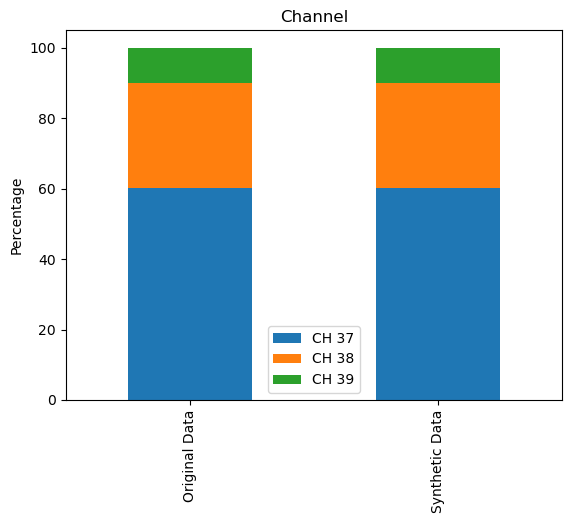

In [29]:
ch_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('Channel')
plt.ylabel('Percentage')
plt.show()